# BAYESIAN REGRESSION

In [1]:
# Import some stuff
import numpy as np 
from scipy.special import erf
import numpy.random as rn
import matplotlib
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
%matplotlib inline  
%pylab inline 
rcParams['font.family'] = 'serif'



from scipy import stats
import seaborn as sns
import pandas as pd
plot_pretty()

Populating the interactive namespace from numpy and matplotlib


In [2]:
x_a = np.array([-1.3,-0.72,0.1,0.63,1.50,1.95,3.20,3.76,4.12,4.68])
y_a = np.array([0.62,1.85,4.39,5.31,7.58, 9.13,12.38,14.57,15.10,17.08])
sigma_y = np.array([0.20,0.30,0.25,0.35,0.15,0.17,0.25,0.38,0.22,0.40])

## Plot data $y$ vs $x$

To get a sense of the data and a rough understanding of the expected values for the parameters $a$, $b$ and $c$, I plot $y$ versus $x$.

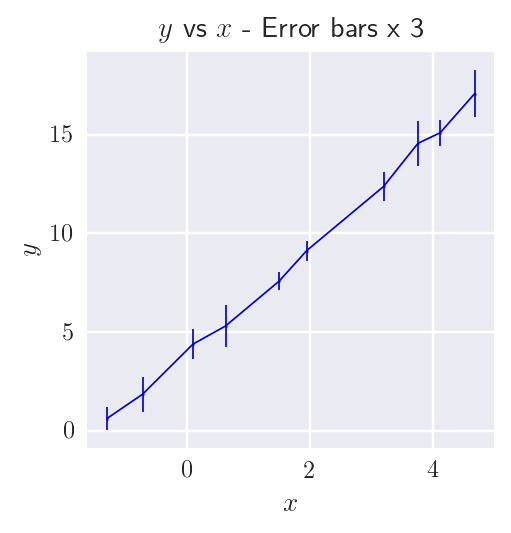

In [3]:
plt.figure(figsize = (3.0,3.0))

plt.errorbar(x_a,y_a, 3*sigma_y, color='mediumblue', linewidth = 0.7)
plt.scatter(x_a,y_a, s= 0.8)

plt.title('$y$ vs $x$ - Error bars x 3')
plt.xlabel('$x$');plt.ylabel('$y$')
plt.show()

We will adopt a model of the form:

\begin{equation}
y = a + bx + cx^2
\end{equation}

And try to determine the values of the parameters of the model

## Exploration of the posterior function

Assuming unoform prior, the posterior function (using $N$ points) is:

\begin{equation}
L = \prod_i^N f_i, \quad N = 1, \dots, 10,
\end{equation}

where the likelihood is given by:
\begin{equation}
f_i  =\mbox{exp}\left[-\frac{(y_i - a - bx_i - cx_i^2)^2}{2\sigma_i^2} \right]
\end{equation}

Assuming that the data poins are not correlated.

In [4]:
# Define the single point likelihood function

def likelihood(x,y,sig_y,a,b,c):
    """
    Function that calculates the likelihood
    given one data point.
    Inputs:
    - 
    """
    model = a + b*x + c*(x**2.0)
    chi_sq = -0.5*((y - model)**2.0)/sig_y**2.0
    
    return np.exp(chi_sq)

In [5]:
a = np.linspace(3.0,4.5,200)
b = np.linspace(2.0,3.0,200)
c = np.linspace(-0.1,0.2,200)
# Define a function that calculates the full 3D likelihood function, using n points

def posterior(n, size):
    """
    Returns posterior function
    Using n points - Use the first n data points
    This is the full 3D posterior function
    - N: number of data points used
    - size: size of the matrix
    """
    post = np.ones([size,size,size])
    
    # Get the first n data points
    x_p = x_a[0:n]
    y_p = y_a[0:n]
    sig_p = sigma_y[0:n]


    for i in range(size):
        a_loc = a[i]
        for j in range(size):
            b_loc = b[j]
            for k in range(size):
                c_loc = c[k]
                
                like_prod = 1.0
                for q in range(n):
                    x_loc = x_p[q]
                    y_loc = y_p[q]
                    sig_loc = sig_p[q]
                    
                    post[i,j,k] = post[i,j,k]*likelihood(x_loc, y_loc, sig_loc, a_loc, b_loc, c_loc)
            
    return post      


In [6]:
posterior_3D_1pt = posterior(1, 200)
posterior_3D_2pt = posterior(2,200)
posterior_3D_10pt = posterior(10, 200)

In [7]:
#Marginalize now

#Using one point
post_ab_1pt = np.sum(posterior_3D_1pt, axis = 2)
post_ac_1pt = np.sum(posterior_3D_1pt, axis = 1)
post_bc_1pt = np.sum(posterior_3D_1pt, axis = 0)

#Using two points
post_ab_2pt = np.sum(posterior_3D_2pt, axis = 2)
post_ac_2pt = np.sum(posterior_3D_2pt, axis = 1)
post_bc_2pt = np.sum(posterior_3D_2pt, axis = 0)

#Using ten points
post_ab_10pt = np.sum(posterior_3D_10pt, axis = 2)
post_ac_10pt = np.sum(posterior_3D_10pt, axis = 1)
post_bc_10pt = np.sum(posterior_3D_10pt, axis = 0)

## Plot the marginalized posteriors

Let's plot now the marginalized posteriors, for the set of parameters $a - b$, $a - c$, $b - c$. We marginalize over the third parameter each time.

### Using 1 data point

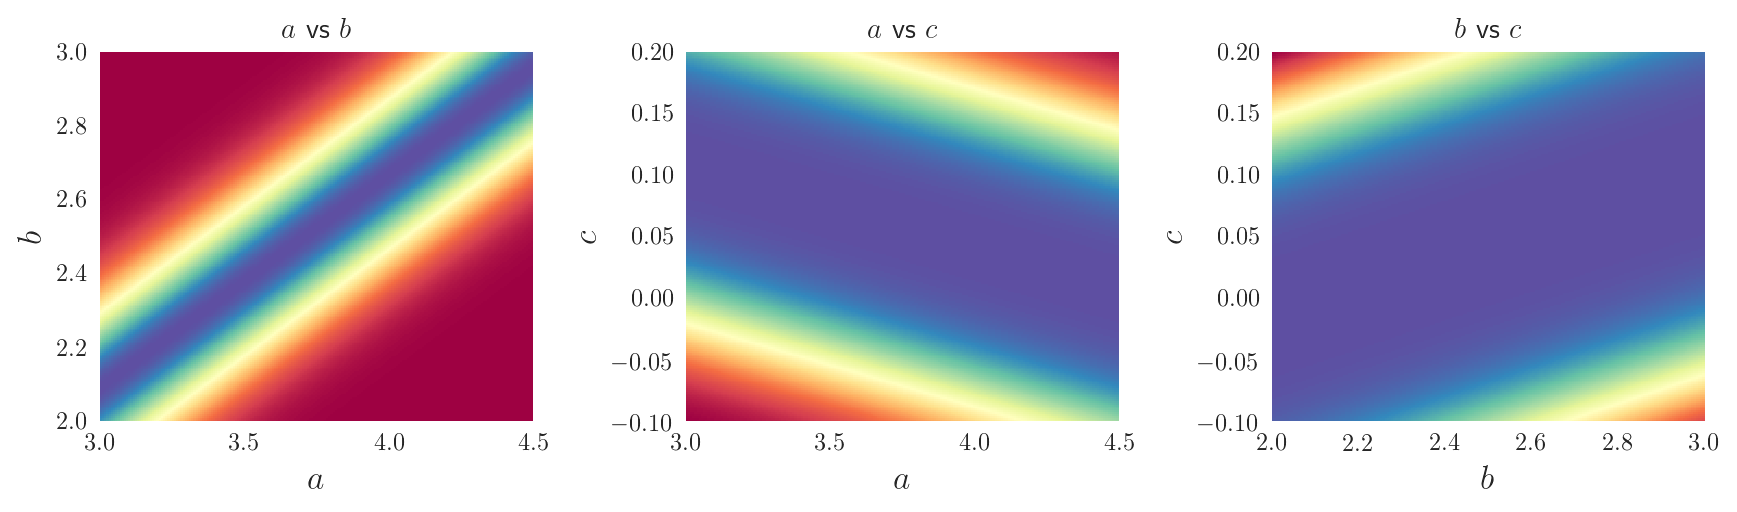

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (10,3))

ax[0].pcolormesh(a, b, post_ab_1pt, cmap='Spectral')
ax[0].set_xlabel('$a$',fontsize=14);ax[0].set_ylabel('$b$',fontsize=14)
ax[0].set_title('$a$ vs $b$')

ax[1].pcolormesh(a, c, post_ac_1pt, cmap='Spectral')
ax[1].set_xlabel('$a$',fontsize=14);ax[1].set_ylabel('$c$',fontsize=14)
ax[1].set_title('$a$ vs $c$')

ax[2].pcolormesh(b, c, post_bc_1pt, cmap='Spectral')
ax[2].set_xlabel('$b$',fontsize=14);ax[2].set_ylabel('$c$',fontsize=14)
ax[2].set_title('$b$ vs $c$')

#plt.title('Posterior - Using 1 data point')

plt.tight_layout()
plt.show()

### Using 2 data points

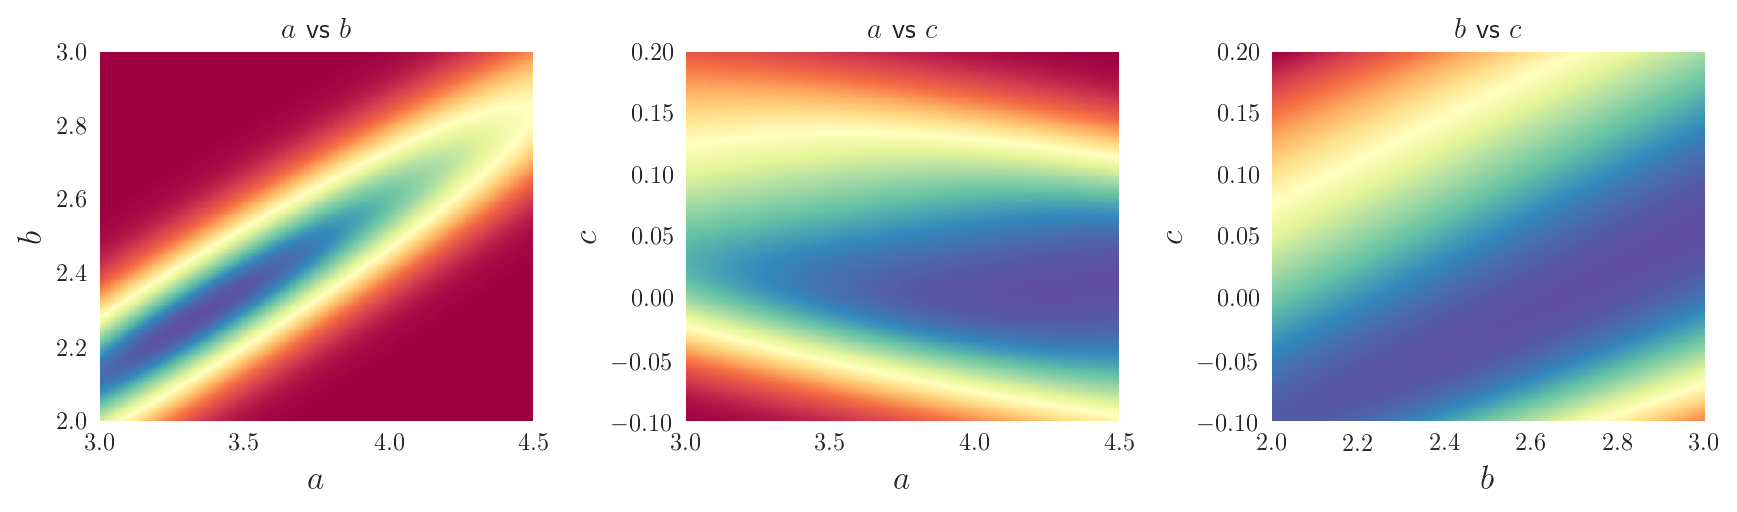

In [9]:
fig, ax = plt.subplots(1, 3, figsize = (10,3))

ax[0].pcolormesh(a, b, post_ab_2pt, cmap='Spectral')
ax[0].set_xlabel('$a$',fontsize=14);ax[0].set_ylabel('$b$',fontsize=14)
ax[0].set_title('$a$ vs $b$')

ax[1].pcolormesh(a, c, post_ac_2pt, cmap='Spectral')
ax[1].set_xlabel('$a$',fontsize=14);ax[1].set_ylabel('$c$',fontsize=14)
ax[1].set_title('$a$ vs $c$')

ax[2].pcolormesh(b, c, post_bc_2pt, cmap='Spectral')
ax[2].set_xlabel('$b$',fontsize=14);ax[2].set_ylabel('$c$',fontsize=14)
ax[2].set_title('$b$ vs $c$')

plt.tight_layout()
plt.show()

### Using 3 data points

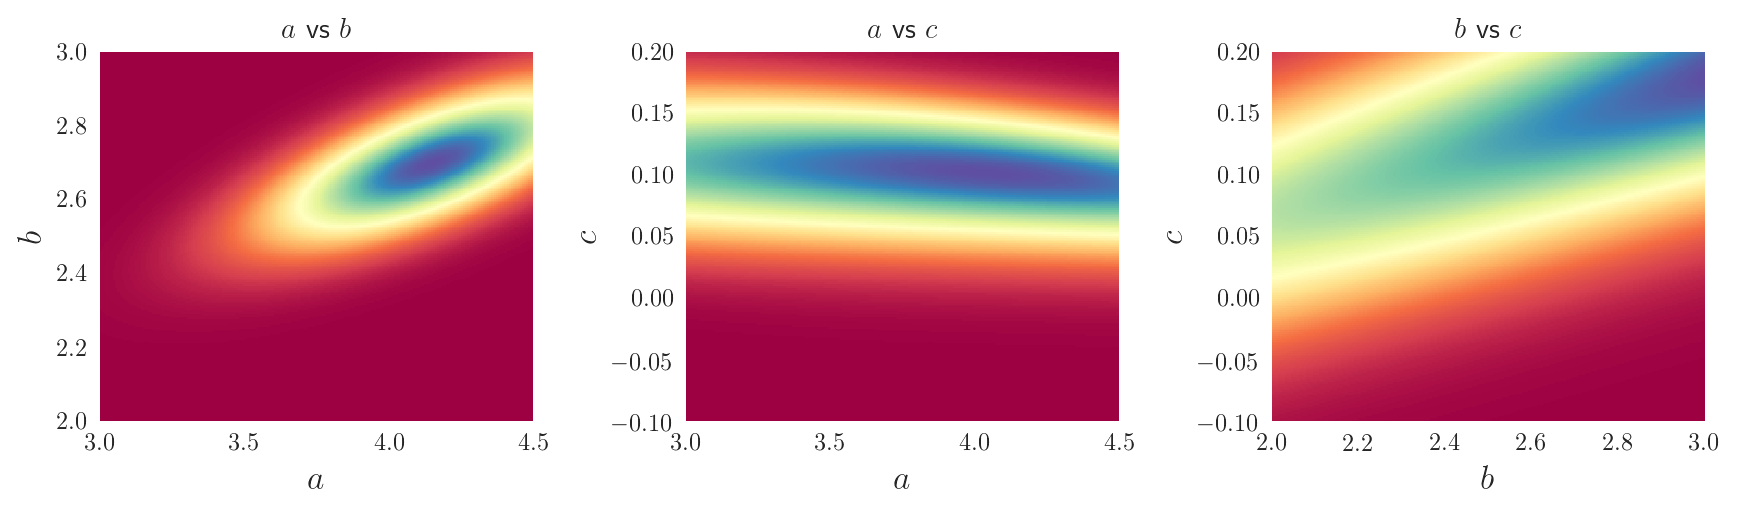

In [10]:
posterior_3D_3pt = posterior(3,200)

#marginalized posterior 
post_ab_3pt = np.sum(posterior_3D_3pt, axis = 2)
post_ac_3pt = np.sum(posterior_3D_3pt, axis = 1)
post_bc_3pt = np.sum(posterior_3D_3pt, axis = 0)

fig, ax = plt.subplots(1, 3, figsize = (10,3))

ax[0].pcolormesh(a, b, post_ab_3pt, cmap='Spectral')
ax[0].set_xlabel('$a$',fontsize=14);ax[0].set_ylabel('$b$',fontsize=14)
ax[0].set_title('$a$ vs $b$')

ax[1].pcolormesh(a, c, post_ac_3pt, cmap='Spectral')
ax[1].set_xlabel('$a$',fontsize=14);ax[1].set_ylabel('$c$',fontsize=14)
ax[1].set_title('$a$ vs $c$')

ax[2].pcolormesh(b, c, post_bc_3pt, cmap='Spectral')
ax[2].set_xlabel('$b$',fontsize=14);ax[2].set_ylabel('$c$',fontsize=14)
ax[2].set_title('$b$ vs $c$')

#plt.title('Posterior - Using 3 data points')

plt.tight_layout()
plt.show()

### Using all 10 data points

Also I zoom in a little bit here, to see better the posterior

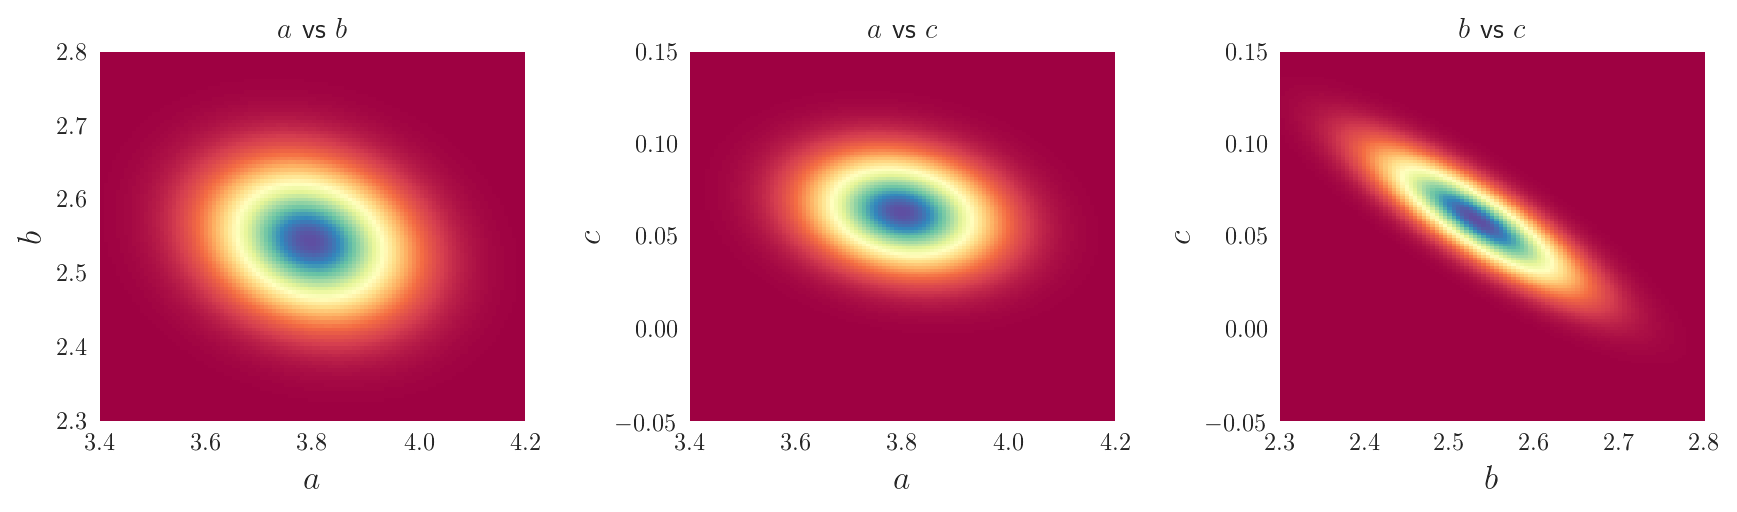

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (10,3))

ax[0].pcolormesh(a, b, post_ab_10pt, cmap='Spectral')
ax[0].set_xlabel('$a$',fontsize=14);ax[0].set_ylabel('$b$',fontsize=14)
ax[0].set_title('$a$ vs $b$')
ax[0].set_xlim(3.4,4.2);ax[0].set_ylim(2.3,2.8)

ax[1].pcolormesh(a, c, post_ac_10pt, cmap='Spectral')
ax[1].set_xlabel('$a$',fontsize=14);ax[1].set_ylabel('$c$',fontsize=14)
ax[1].set_title('$a$ vs $c$')
ax[1].set_xlim(3.4,4.2);ax[1].set_ylim(-0.05,0.15)

ax[2].pcolormesh(b, c, post_bc_10pt, cmap='Spectral')
ax[2].set_xlabel('$b$',fontsize=14);ax[2].set_ylabel('$c$',fontsize=14)
ax[2].set_title('$b$ vs $c$')
ax[2].set_xlim(2.3,2.8);ax[2].set_ylim(-0.05,0.15)

plt.tight_layout()
plt.show()

## Posterior distribution, best fit values and confidence intervals for $a$, $b$, $c$.

Here we plot the posterior distribution of the parameters $a$, $b$ and $c$ (marginalizing over the other two parameters each time) and and find the best fit values and their errors:

\begin{equation}
\hat{a} \pm \sigma_a, \quad \hat{b} \pm \sigma_b, \quad \hat{c} \pm \sigma_c 
\end{equation}

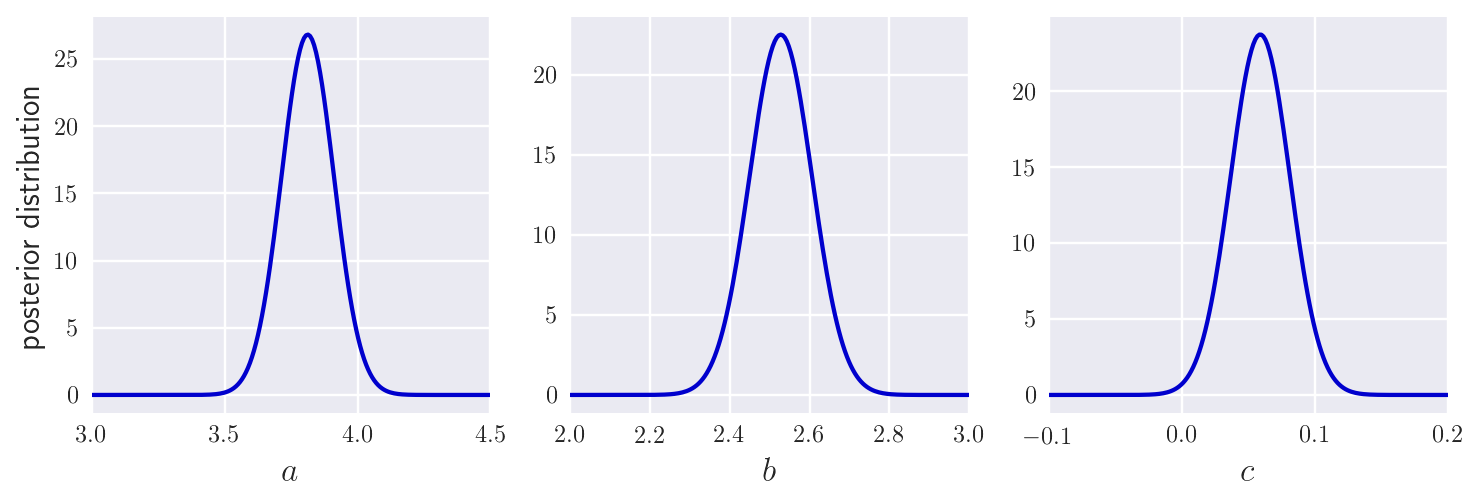

In [12]:
post_a = np.sum(post_ab_10pt, axis=1)
post_b = np.sum(post_ab_10pt, axis=0)
post_c = np.sum(post_bc_10pt, axis=0)

fig, ax = plt.subplots(1, 3, figsize = (10,3))

ax[0].plot(a, post_a, c='mediumblue')
ax[0].set_xlabel('$a$', fontsize=14);ax[0].set_ylabel('posterior distribution', fontsize=13)
ax[0].set_xlim(3.0,4.5)

ax[1].plot(b, post_b, c='mediumblue')
ax[1].set_xlabel('$b$', fontsize=14)
ax[1].set_xlim(2.0,3.0)

ax[2].plot(c, post_c, c='mediumblue')
ax[2].set_xlabel('$c$', fontsize=14)
ax[2].set_xlim(-0.1,0.2)

plt.show()

Calculate the moments (mean and standard deviation now)

In [13]:
mean_a = np.sum(a*post_a)/np.sum(post_a)
sig_a =  np.sqrt(np.abs(np.sum((a-mean_a)**2*post_a)/np.sum(post_a)))

mean_b = np.sum(b*post_b)/np.sum(post_b)
sig_b =  np.sqrt(np.abs(np.sum((b-mean_b)**2*post_b)/np.sum(post_b)))

mean_c = np.sum(c*post_c)/np.sum(post_c)
sig_c =  np.sqrt(np.abs(np.sum((c-mean_c)**2*post_c)/np.sum(post_c)))
print('Mean a and sigma_a')
print(mean_a);print(sig_a)

print('Mean b and sigma_b')
print(mean_b);print(sig_b)

print('Mean c and sigma_c')
print(mean_c);print(sig_c)

Mean a and sigma_a
3.8127341339098466
0.09873006648859516
Mean b and sigma_b
2.527745810570102
0.07836297788516071
Mean c and sigma_c
0.0589571221276329
0.022302263199880993


So, we now have that:

\begin{equation}
a = 3.8 \pm 0.1, \quad b = 2.53 \pm 0.08, \quad c = 0.058 \pm 0.022
\end{equation}

(For more significant figures, check above)

## Calculation of the parameter covariance matrix from the posterior


We will try to calculate the covariance matrix of the parameters, $C_{param}(a, b, c)$ using the posterior function $L(a, b, c)$ we calculated above.

In the discrete case, we will have, for example:
\begin{equation}
\mbox{Cov}(a,b) = \frac{\sum_a \sum_b \sum_c (a - \hat{a})(b-\hat{b}) L(a,b,c)}{\sum_a \sum_b \sum_c L(a,b,c)}
\end{equation}

And similarly for the rest.

It is very easy to do it using matrix notation, for example:

\begin{equation}
\mbox{Cov}(a,b) = [a -\hat{a}]^T \tilde{L}_{ab} [b - \hat{b}]
\end{equation}

Where $[a -\hat{a}]$ and $[b - \hat{b}]$ are vectors and $\tilde{L}_{ab}$ is the marginalized (over $c$) posterior matrix for the parameters $a$ and $b$.

In [14]:
cov_ab = np.dot((a-mean_a),np.matmul(post_ab_10pt,(b-mean_b)))/np.sum(post_ab_10pt) 
cov_ac = np.dot((a-mean_a),np.matmul(post_ac_10pt,(c-mean_c)))/np.sum(post_ac_10pt)
cov_bc = np.dot((b-mean_b),np.matmul(post_bc_10pt,(c-mean_c)))/np.sum(post_bc_10pt)

print(cov_ab, cov_ac, cov_bc)

(-0.0013860906745314125, -0.0004253489343230759, -0.0014829441276255175)


So, the covariances are: 

\begin{equation}
\mbox{Cov}(a,b) = -0.001386, \quad \mbox{Cov}(a,c) = -0.000425,\quad \mbox{Cov}(b,c) = -0.00148
\end{equation}

And of course, to get the other covariances we simply use the fact that the covariance matrix is symmetric $\mbox{Cov}(a,b) = \mbox{Cov}(b,a)$.

Let's make a heatmap to see it better.

In [15]:
#Define the covariance matrix
Cov_mat = np.zeros([3,3])
#Diagonal terms
Cov_mat[0,0] = sig_a**2.0;Cov_mat[1,1]=sig_b**2.0;Cov_mat[2,2]=sig_c**2.0

#Non-diagonal terms
Cov_mat[0,1] = Cov_mat[1,0] = cov_ab
Cov_mat[0,2] = Cov_mat[2,0] = cov_ac
Cov_mat[1,2] = Cov_mat[2,1] = cov_bc

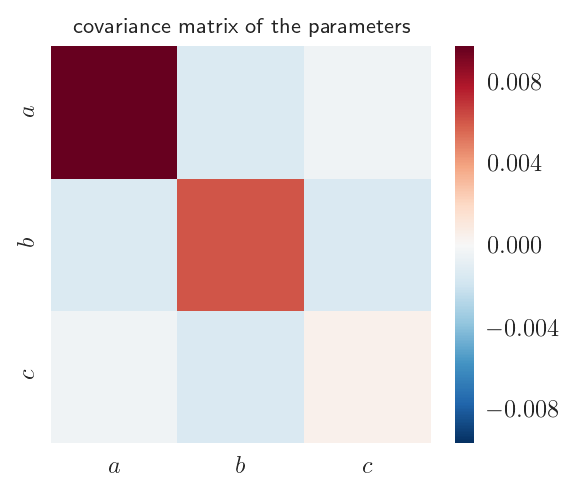

In [16]:
plot_pretty()

fig = plt.figure(figsize=(3.5,3))

sns.heatmap(Cov_mat)

x_0 = [0.5,1.5,2.5]
y_0 = [2.5,1.5,0.5]
labels = ['$a$', '$b$', '$c$']


# ... and label them with the respective list entries
plt.xticks(x_0,labels)
plt.yticks(y_0,labels)

plt.title('covariance matrix of the parameters', fontsize = 9)

plt.show()

## Calculation of the Fisher Matrix

We calculate the Fisher Matrix, using the formula:

\begin{equation}
F_{ij} = \frac{\partial \vec{\mu}^T}{\partial {\theta_i}}C^{-1}_{data} \frac{\partial \vec{\mu}}{\partial \theta_j}
\end{equation}

Where $\mu_i = y_i - [a + bx_i +cx_i^2]$. In our case, of course $\vec{\theta} = [a,b,c]$. The data covariance matrix is diagonal $C_{data} = \mbox{diag}(\sigma_y^2)$.

From the above, we have:

\begin{equation}
\frac{\partial  \vec{\mu}}{\partial a} = \vec{1},  \quad \frac{\partial \vec{\mu}}{\partial b} = \vec{x}, \quad \frac{\partial \vec{\mu}}{\partial c} = \vec{x}^2
\end{equation}

Also, again, notice that the Fisher matrix is symmetric:

\begin{equation}
F_{ij} = F_{ji}
\end{equation}

In [17]:
# Define the data covariance matrix

#cov_data =


### Calculation of Uncertainty on $y$ and plot

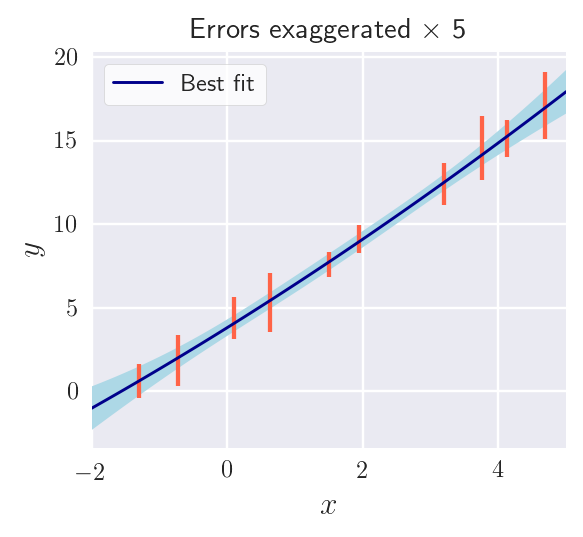

In [18]:
x_lin = np.linspace(-2.0, 5.0, 100)
#Best fit
y_fit = mean_a + mean_b*x_lin + mean_c*(x_lin**2.0)

#Error 
sig_y = np.zeros(100)
for i in range (100):
    x_vec = np.array([1,x_lin[i],x_lin[i]**2.0])
    sig_sq = np.dot(x_vec, np.matmul(Cov_mat,x_vec))
    sig_y[i] = np.sqrt(sig_sq)


fig = plt.figure(figsize = (3.5,3.0))
plt.plot(x_lin,y_fit, c= 'darkblue', linewidth=1.2, label='Best fit')
plt.fill_between(x_lin, y_fit-5*sig_y, y_fit+5*sig_y, facecolor='lightblue')
plt.errorbar(x_a,y_a, 5*sigma_y, fmt='none', ecolor='tomato')

plt.title(R'Errors exaggerated $\times$ 5')
plt.xlabel('$x$', fontsize=13);plt.ylabel('$y$', fontsize=13)
plt.legend(frameon=True, loc='upper left', fontsize=10, facecolor='w')
plt.xlim(-2.0,5.0)
plt.show()

## Posterior Exploration using MCMC

Here we explore the posterior distribution, using the MCMC method to dample it. We use the Metropolis-Hastings algorithm.

In [19]:
# Definition of the MCMC explorer

def MCMC(n, x_0, step, modelpdf, *args):
    """
    a simple single chain  MCMC Metropolis-Hastings sampler
    with step proposal distribution of U(-step,step)
    n - integer
        number of MCMC steps (iterations) to take
    x0 - float
        initial x value
    step - float
        step size controlling step proposal distribution
    modelpdf - python function object
        ln(pdf) where pdf is the target pdf to sample
    args - pointer to a list
        list of arguments to pass modelpdf
        
    Returns:
    ---------
    xchain - list
        list of x values in the MCMC chains
    """
    
    x=x_0 #Initial value(s) for the walker to start
    npars = np.size(x_0) #This gives us the dimensions of the problem
    xchain = [] #Create empty array
    xchain.append(x) #Initialize
    
    nsample = 0 #Steps taken by the sampler
    
    while (nsample < n):
        delta = rn.uniform(-step, step, npars)
        xtry = x + delta #trial step 
        # Calculate the value of the pdf in the old and the new point
        pxtry = modelpdf(xtry, *args); px = modelpdf(x, *args)
        
        if (pxtry > px): #In that case accepts always the proposed step
            x = xtry
            xchain.append(x)
        else:
            aprob = pxtry - px
            # Draw a random number in the [0,1) range
            u = rn.uniform(0.0,1.0)
            
            if (u < np.exp(aprob)):
                x = xtry
                xchain.append(x)
            else:
                xchain.append(x)
        
        nsample +=1
        
    return np.array(xchain)

In [20]:
# Define here the posterior to be sampled - Using all ten points directly
# Atually we define the log posterior
def log_likelihood(x_l, y_l, sig_l, a, b, c):
    """
    Function that calculates the log likelihood
    given one data point.
    Inputs:
    - 
    """
    model = a + b*x_l + c*(x_l**2.0)
    chi_sq = -0.5*((y_l - model)**2.0)/sig_l**2.0
    
    return chi_sq
# =================================================
# =================================================
def post_sampled(x):
    """
    Posterior distribution - to be sampled
    Actually for computational efficieny, this 
    contains the log of the posterior
    
    x contains the three parameters of the model:
    a, b, c
    ----------------------------------------
    Returns:
    The value of the posterior for specific values
    of a, b, c
    """
    a = x[0]; b = x[1]; c = x[2]
    
    post = 0.0
    for i in range(10):
        x_loc = x_a[i]
        y_loc = y_a[i]
        sig_loc = sigma_y[i]
        
        post += log_likelihood(x_loc, y_loc, sig_loc, a, b, c)
        
    return post

In [21]:
from chainconsumer import ChainConsumer

n = 2e6
x_0 = [4.0, 3.0, 0.1]
step = 0.1

chain_res = MCMC(n, x_0, step, post_sampled)

### Determine burn-in

In [22]:
chain_a = chain_res[:,0]
chain_b = chain_res[:,1]
chain_c = chain_res[:,2]

nsize = len(chain_a)
print(nsize)

2000001


In [23]:
def cum_mean(arr):
    """
    Gets an array and returs the cumulative mean 
    Whatever that means
    """
    num_arr = np.arange(len(arr))
    cuv_mean = np.cumsum(arr)/(num_arr + 1.0)
    return cuv_mean
    
cumul_a = cum_mean(chain_a)
cumul_b = cum_mean(chain_b)
cumul_c = cum_mean(chain_c)

nsteps = np.arange(nsize)

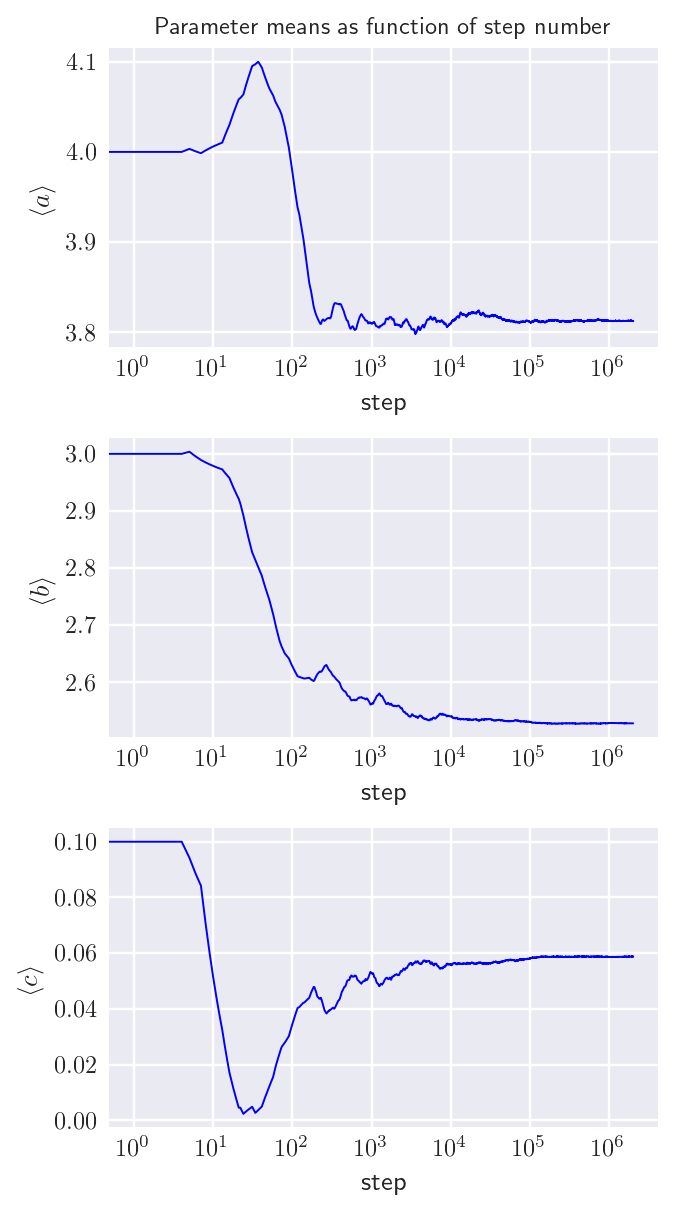

In [24]:
fig, ax = plt.subplots(3, 1, figsize = (4,7))

ax[0].plot(nsteps, cumul_a, c='blue', linewidth=0.8)
#ax[0].set_xlim(0,10000)
#ax[0].set_ylim(3.7,4.0)
ax[0].set_ylabel(r'$\langle a \rangle$')
ax[0].set_xlabel('step')
ax[0].set_xscale('log')

ax[1].plot(nsteps, cumul_b, c='blue', linewidth=0.8)
#ax[1].set_xlim(0,10000)
#ax[1].set_ylim(2.4,2.9)
ax[1].set_ylabel(r'$\langle b \rangle$')
ax[1].set_xlabel('step')
ax[1].set_xscale('log')

ax[2].plot(nsteps, cumul_c, c='blue', linewidth=0.8)
#ax[2].set_xlim(0,10000)
ax[2].set_ylabel(r'$\langle c \rangle$')
ax[2].set_xlabel('step')
ax[2].set_xscale('log')


ax[0].set_title('Parameter means as function of step number', fontsize=10)
plt.tight_layout()
plt.show()

From the above we see that the chain stabilizes after the step no $\sim 10000$. So we will disregard the first 10000 steps.


### Parameter posteriors

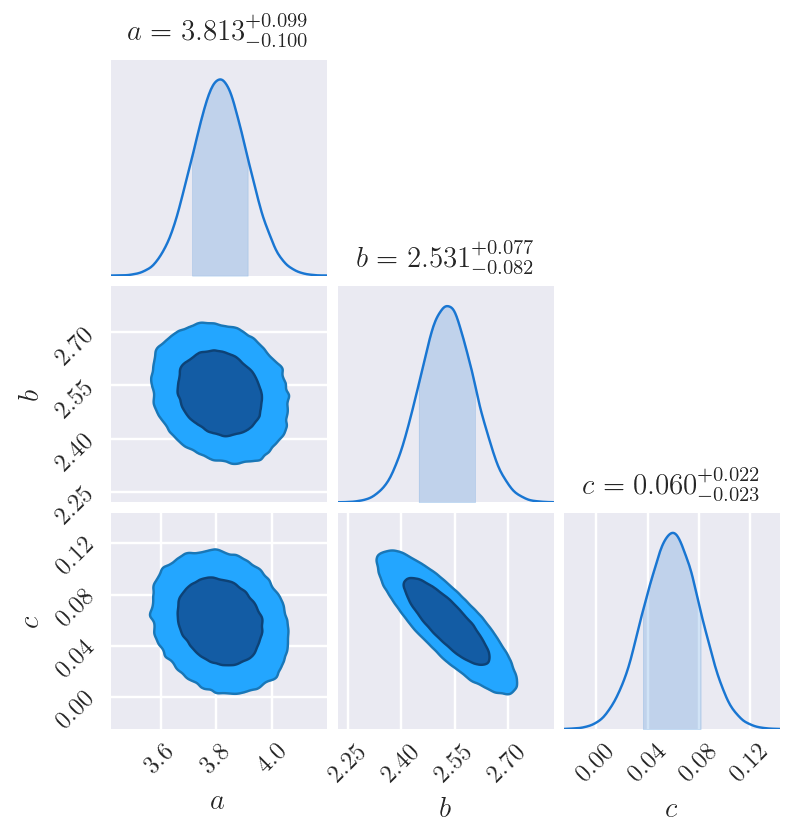

In [25]:
chain_burned = chain_res[10000:,:]

c = ChainConsumer()
c.add_chain(chain_burned, parameters=["$a$", "$b$", "$c$"])
fig = c.plotter.plot()

### Autocorrelation of chain 

We plot the autocorrelation of chain, defined as:

\begin{equation}
\rho_{\kappa} = \frac{\sum_{i=1}^{N -\kappa}(\theta_i - \bar{\theta})(\theta_{i+\kappa} - \bar{\theta})}{\sum_{i =1}^N (\theta_i - \bar{\theta})^2}
\end{equation}

where $\theta$ represents each one of the parameters of the model (here, $\theta = a,b,c$). 
We plot here the autocorrelation as a function of chain length, for the three parameters.

In [82]:
# Define a function that calculates and returns the autocorrelation
# of a chain, given a chain of one of the parameters

def autocorrelation(thet_chain):
    """
    
    """
    N_size = len(thet_chain)
    
    # Contains kappa
    #kappa_lin_1 = np.linspace(0.0, 1.0, 1000)
    #kappa_lin_2 = np.linspace(1.0, 6.0, 5000)
    #kappa_lin = np.concatenate((kappa_lin_1, kappa_lin_2))
    #kappa = 10.0**kappa_lin
    kappa = np.arange(1,10000)
    #Calculate mean thete -mean of the parameter
    thet_mean = np.mean(thet_chain)
    
    #Calculate the overal normalization 
    fac_com = (thet_chain - thet_mean)**2.0
    norm_fac = np.sum(fac_com)
    
    #Initialize correlation array
    corr_arr = np.zeros(len(kappa))
    
    for k in range(len(kappa)):
        thet_1 = thet_chain[:(N_size - k)] 
        thet_2 = thet_chain[k:]
        
        fac_1 = thet_1 - thet_mean
        fac_2 = thet_2 - thet_mean
        
        corr_arr[k] = np.sum(fac_1*fac_2)/norm_fac
        
    return kappa, corr_arr
           

In [83]:
kap, corr_a = autocorrelation(chain_a)
kap, corr_b = autocorrelation(chain_b)
kap, corr_c = autocorrelation(chain_c)

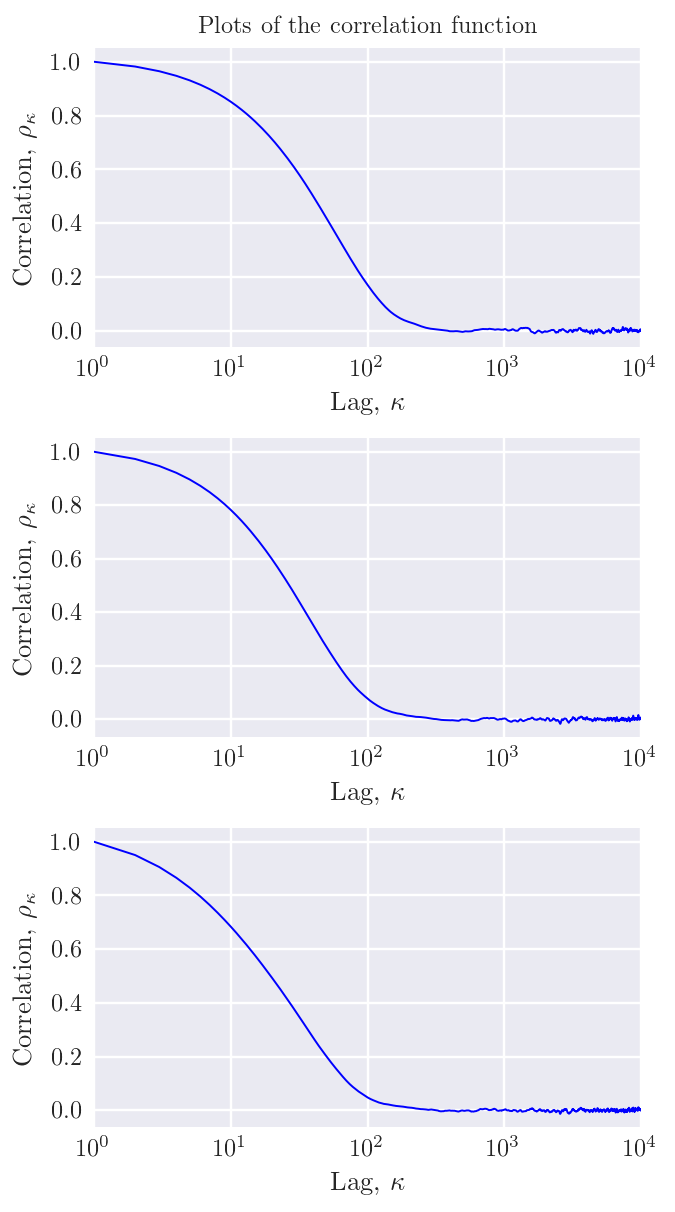

In [96]:
fig, ax = plt.subplots(3, 1, figsize = (4,7))

ax[0].plot(kap, corr_a, c='blue', linewidth=0.8)
ax[0].set_xscale('log')
ax[0].set_xlim(1,1e4)
ax[0].set_xlabel('Lag, $\kappa$')
ax[0].set_ylabel(r'Correlation, $\rho_\kappa$')

ax[1].plot(kap, corr_b, c='blue', linewidth=0.8)
ax[1].set_xscale('log')
ax[1].set_xlim(1,1e4)
ax[1].set_xlabel('Lag, $\kappa$')
ax[1].set_ylabel(r'Correlation, $\rho_\kappa$')

ax[2].plot(kap, corr_c, c='blue', linewidth=0.8)
ax[2].set_xscale('log')
ax[2].set_xlim(1,1e4)
ax[2].set_xlabel('Lag, $\kappa$')
ax[2].set_ylabel(r'Correlation, $\rho_\kappa$')


ax[0].set_title('Plots of the correlation function', fontsize=10)
plt.tight_layout()
plt.show()

### Gellman-Rubin convergence test

Here we will calculate the Gellman-Rubin diagnostic, $\hat{R}$, defined as the in-chain variance over between-chains variance:

\begin{equation}
\hat{R} = \sqrt{\frac{V(\theta)}{W}}
\end{equation}

If we have $m$ chains, each one of length $n$, then the within-chain variance is defined as:

\begin{equation}
W = \frac{1}{m}\sum_{j=1}^m \sigma_j^2, \quad \sigma_j^2 = \frac{1}{n-1}\sum_{i=1}^n (\theta_{ij} - \bar{\theta}_j)^2
\end{equation}

Then, we define between-walker variance:
\begin{equation}
B = \frac{n}{m-1}\sum_{j = 1}^m (\bar{\theta}_j - {\bar{\bar{\theta}}})^2, \quad {\bar{\bar{\theta}}} = \frac{1}{m} \sum_{j=1}^m \bar{\theta}_j
\end{equation}

The in chain variance is defined:
\begin{equation}
V(\theta) = \left(1- \frac{1}{n} \right)W + \frac{1}{n}B
\end{equation}

Here I will consider $m = 100$ chains of length $n = 10^5$ (Otherwise it will take too much to run). I will calculate the statistic as a function of single-chain step (in steps of 1000).


In [108]:
m = 10
n_size = int(1e5)

#Create a matrix a matrix that will contain the 
# 100 chains
chains = np.zeros([m,n_size+1,3])

for i in range(m):
    al_temp = rn.uniform(3.5, 4.1)
    bet_temp = rn.uniform(2.0,3.0)
    c_temp =  rn.uniform(0.02, 0.12)
    x_0 = [al_temp, bet_temp, c_temp]
    step = 0.1
    
    chains[i,:,:] = MCMC(n_size, x_0, step, post_sampled)

In [112]:
chains_a = chains[:,:,0]
chains_b = chains[:,:,1]
chains_c = chains[:,:,2]

#Now write a function that takes one of the above chains and returns the Gellman-Rubin diagnostic 
# In steps of 1000

def Gell_Rubin(chain_par):
    
    n_arr = np.linspcace(0,)

In [117]:
lala_arr = np.arange(0,1e5+1000, 1000)
print(lala_arr)

[     0.   1000.   2000.   3000.   4000.   5000.   6000.   7000.   8000.
   9000.  10000.  11000.  12000.  13000.  14000.  15000.  16000.  17000.
  18000.  19000.  20000.  21000.  22000.  23000.  24000.  25000.  26000.
  27000.  28000.  29000.  30000.  31000.  32000.  33000.  34000.  35000.
  36000.  37000.  38000.  39000.  40000.  41000.  42000.  43000.  44000.
  45000.  46000.  47000.  48000.  49000.  50000.  51000.  52000.  53000.
  54000.  55000.  56000.  57000.  58000.  59000.  60000.  61000.  62000.
  63000.  64000.  65000.  66000.  67000.  68000.  69000.  70000.  71000.
  72000.  73000.  74000.  75000.  76000.  77000.  78000.  79000.  80000.
  81000.  82000.  83000.  84000.  85000.  86000.  87000.  88000.  89000.
  90000.  91000.  92000.  93000.  94000.  95000.  96000.  97000.  98000.
  99000. 100000.]
